In [10]:
import cv2
import numpy as np

from IPython.display import display, Image


def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))


def add_edge(img):
    H, W = img.shape
    WID = int(np.max(img.shape) * 2**0.5)
    e_img = np.zeros((WID, WID))
    e_img[int((WID-H)/2):int((WID+H)/2),
          int((WID-W)/2):int((WID+W)/2)] = img
    return e_img


def translation_matrix(tx, ty):
    return np.array([[1, 0, -tx],
                     [0, 1, -ty],
                     [0, 0, 1]])


def rotation_matrix(a):
    return np.array([[np.cos(a), -np.sin(a), 0],
                     [np.sin(a),  np.cos(a), 0],
                     [        0,          0, 1]])


def shear_matrix(mx, my):
    return np.array([[1, -mx, 0],
                     [-my, 1, 0],
                     [0,  0, 1]])    


def scaling_matrix(sx, sy):
    return np.array([[1/sx, 0, 0],
                     [0, 1/sy, 0],
                     [0,  0, 1]])


def affin(img, m):
    WID = np.max(img.shape)
    x = np.tile(np.linspace(-1, 1, WID).reshape(1, -1), (WID, 1))
    y = np.tile(np.linspace(-1, 1, WID).reshape(-1, 1), (1, WID))
    p = np.array([[x, y, np.ones(x.shape)]])
    dx, dy, _ = np.sum(p * m.reshape(*m.shape, 1, 1), axis=1)
    u = np.clip((dx + 1) * WID / 2, 0, WID-1).astype('i')
    v = np.clip((dy + 1) * WID / 2, 0, WID-1).astype('i')
    return img[v, u]

In [11]:
def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))


def add_edge(img):
    H, W = img.shape
    WID = int(np.max(img.shape) * 2**0.5)
    e_img = np.zeros((WID, WID))
    e_img[int((WID-H)/2):int((WID+H)/2),
          int((WID-W)/2):int((WID+W)/2)] = img
    return e_img

In [12]:
def translation_matrix(tx, ty):
    return np.array([[1, 0, -tx],
                     [0, 1, -ty],
                     [0, 0, 1]])


def rotation_matrix(a):
    return np.array([[np.cos(a), -np.sin(a), 0],
                     [np.sin(a),  np.cos(a), 0],
                     [        0,          0, 1]])


def shear_matrix(mx, my):
    return np.array([[1, -mx, 0],
                     [-my, 1, 0],
                     [0,  0, 1]])    


def scaling_matrix(sx, sy):
    return np.array([[1/sx, 0, 0],
                     [0, 1/sy, 0],
                     [0,  0, 1]])

In [13]:
def affin(img, m):
    WID = np.max(img.shape)
    x = np.tile(np.linspace(-1, 1, WID).reshape(1, -1), (WID, 1))
    y = np.tile(np.linspace(-1, 1, WID).reshape(-1, 1), (1, WID))
    p = np.array([[x, y, np.ones(x.shape)]])
    dx, dy, _ = np.sum(p * m.reshape(*m.shape, 1, 1), axis=1)
    u = np.clip((dx + 1) * WID / 2, 0, WID-1).astype('i')
    v = np.clip((dy + 1) * WID / 2, 0, WID-1).astype('i')
    return img[v, u]

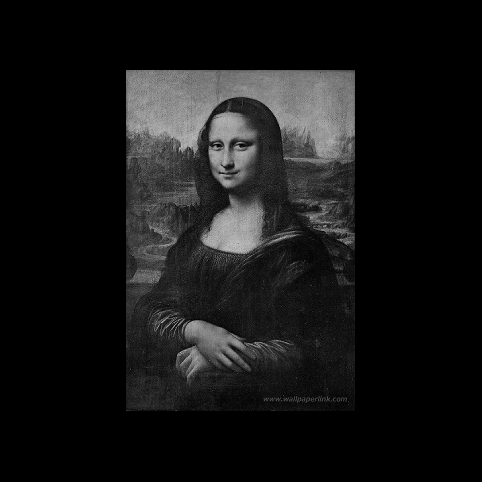

In [22]:
img = cv2.imread('mona.jpg', 0)
e_img = add_edge(img)
display_cv_image(e_img, '.png')

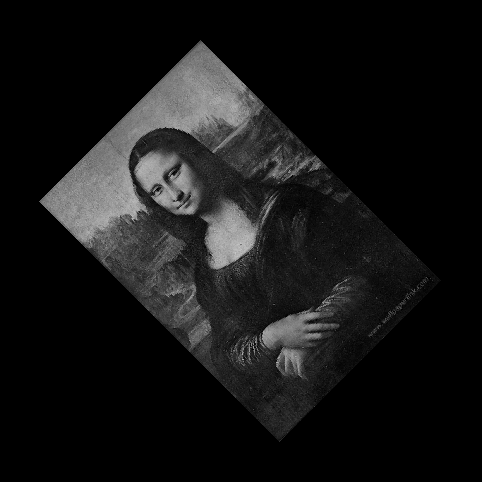

In [23]:
m = rotation_matrix(np.pi / 4)
display_cv_image(affin(e_img, m), '.png')

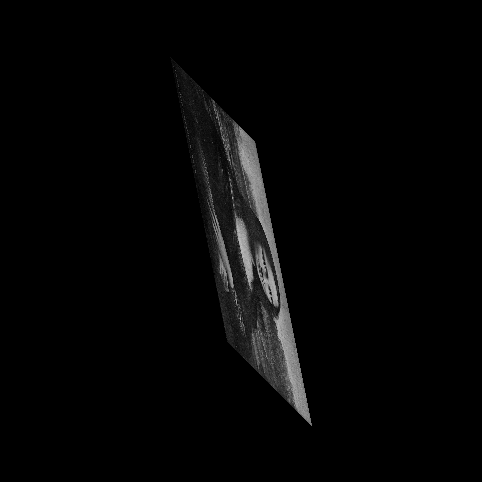

In [24]:
m = shear_matrix(1, 5)
display_cv_image(affin(e_img, m), '.png')

@sai-sui
2019年03月11日に更新
Python: 自作アフィン変換（改）
https://qiita.com/sai-sui/items/dacbdc9a3f009870d63a